# задание № 2
Реализовать алгоритм эмпирического восстановления возможности, максимально
согласованной с вероятностью, не изменяющейся в процессе испытаний (3.4.1), с
возможностью задавать вероятность, контролировавшую исход испытаний. Результатом
работы программы должны быть:
1. восстановленное распределение возможностей (с точностью до эквивалентности),
2. график зависимости числа элементарных событий, решение об упорядоченности
возможностей которых принято, от номера итерации.

p 262-265

In [2]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from numba import jit

In [3]:
N = 10
Omega = np.arange(start=0,stop=N)
Omega

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
def Gauss(x,mu,sigma):
    return np.exp(-np.square((x-mu)/sigma))/np.sqrt(2*np.pi*np.square(sigma))+1/N

def GaussZero(x,mu,sigma):
    return np.exp(-np.square((x-mu)/sigma))/np.sqrt(2*np.pi*np.square(sigma))

def Linear(x):
    return x+1

def Proba1(index, supp):
    a = supp[0]
    b = supp[-1]
    N = len(supp)
    mu = int((b+a)/2)
    sigma = np.maximum(int(np.abs((b+a))/10),1)
    norm = 0
    for i in range(len(supp)):
        norm += Gauss(supp[i],mu,sigma)
    return Gauss(supp[index], mu,sigma)/norm

def Proba2(index, supp):
    a = supp[0]
    b = supp[-1]
    N = len(supp)
    mu = int((b+a)/2)
    sigma = np.maximum(int(np.abs((b+a))/10),1)
    norm = 0
    for i in range(len(supp)):
        norm += Linear(supp[i])
    return Linear(supp[index])/norm

def Proba3(index, supp):
    a = supp[0]
    b = supp[-1]
    N = len(supp)
    mu = int((b+a)/2)
    sigma = np.maximum(int(np.abs((b+a))/10),1)
    norm = 0
    for i in range(len(supp)):
        norm += GaussZero(supp[i],mu,sigma)
    return GaussZero(supp[index],mu,sigma)/norm


# график зависимости числа элементарных событий, решение об упорядоченности возможностей которых принято, от номера итерации

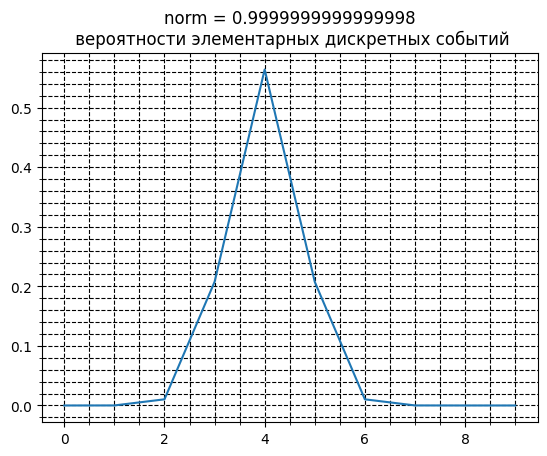

In [24]:
fig,ax = plt.subplots()
x_ = Omega 
y_ = [Proba3(i,x_) for i in range(len(x_))]
ax.plot(x_,y_)
ax.set_title(f'norm = {np.sum(y_)}\n вероятности элементарных дискретных событий')
ax.minorticks_on()
ax.grid(which='both', color='k', linestyle='--')

In [52]:
NU = np.zeros(shape=(N,N))
n = 100000
delta = 0.5
impirical_cnt = {el:0.0 for el in Omega}
number_of_decisions = []
iter_number= []
delta_vec = []
total_cnt = 0
alpha= 0.01
alpha_s=alpha/N
# alpha = 0.01
bad_predict_probas = np.zeros(shape=(N,))
mean_predict_probas = []
proba_at_least_one_error = []
for ITER in tqdm(range(n)):
    # delta = delta*0.999
    delta = np.sqrt(-2.0/(ITER+1)*np.log(alpha_s))
    event = np.random.choice(Omega,size=1,p=y_)[0]
    impirical_cnt[event] += 1.0
    total_cnt += 1.0
    not_decision_cnt =0
    for i in range(N):
        f_i = 0.0
        for j in range(i):
            f_i += impirical_cnt[j]
        f_i += 2*impirical_cnt[i]
        f_i = f_i/total_cnt
        if f_i > 1.0 + delta:
            bad_predict_probas[i] = np.exp(-(ITER+1)*np.square(delta)/2.0)
        elif f_i < 1.0-delta:
            bad_predict_probas[i] = np.exp(-(ITER+1)*np.square(delta)/2.0)
        elif np.abs(f_i-1.0) <= delta:
            not_decision_cnt+=1 
    number_of_decisions.append(N-not_decision_cnt)
    mean_predict_probas.append(np.nanmean(bad_predict_probas))
    proba_at_least_one_error.append((N-1)*np.exp(-(ITER+1)*np.square(delta)/2.0))
    iter_number.append(ITER)
    delta_vec.append(delta)
    if not_decision_cnt == 0:
        print('ordered')
        break



proba_at_least_one_error = np.asarray(proba_at_least_one_error)
number_of_decisions = np.asarray(number_of_decisions)
iter_number = np.asarray(iter_number)
delta_vec = np.asarray(delta_vec)
bad_predict_probas = np.asarray(bad_predict_probas)
delta_last = delta_vec[-1]

100%|██████████| 100000/100000 [00:06<00:00, 15278.99it/s]


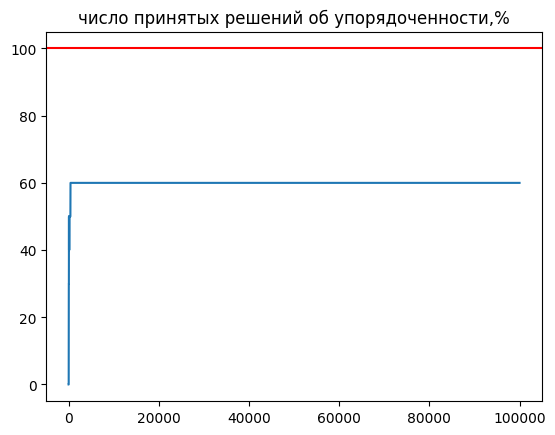

In [53]:
fig,ax = plt.subplots()
ax.plot(iter_number, number_of_decisions/N*100)
ax.set_title(f'число принятых решений об упорядоченности,%')
ax.axhline(100,c='r')

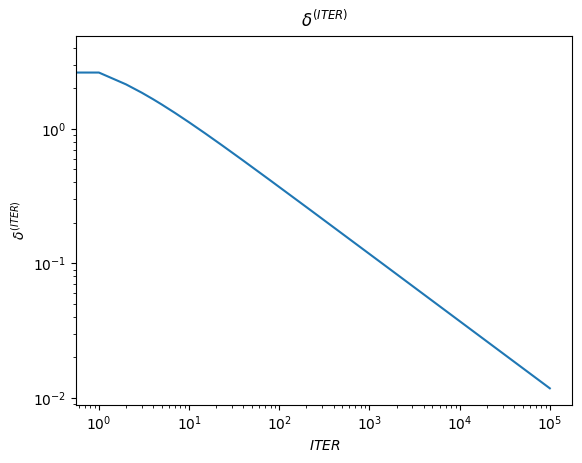

In [54]:
fig,ax = plt.subplots()
ax.plot(iter_number, delta_vec)
ax.set_title(r'$\delta^{(ITER)}$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$ITER$')
ax.set_ylabel(r'$\delta^{(ITER)}$')
print('')

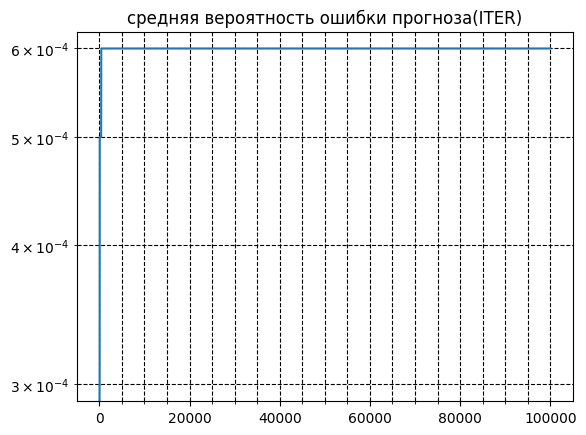

In [55]:
fig,ax = plt.subplots()
ax.plot(iter_number,mean_predict_probas)
ax.set_yscale('log')
ax.minorticks_on()
ax.grid(which='both', color='k', linestyle='--')
ax.set_title('средняя вероятность ошибки прогноза(ITER)')
print('')

In [57]:
print(f'true positive predict with pr >= {1.0-alpha}')

true positive predict with pr >= 0.99


# восстановленное распределение возможностей (с точностью до эквивалентности)

p_0 = p_1 = p_2 = p_3 = p_4 > p_5 > p_6 ? p_7 ? p_8 ? p_9
000011???


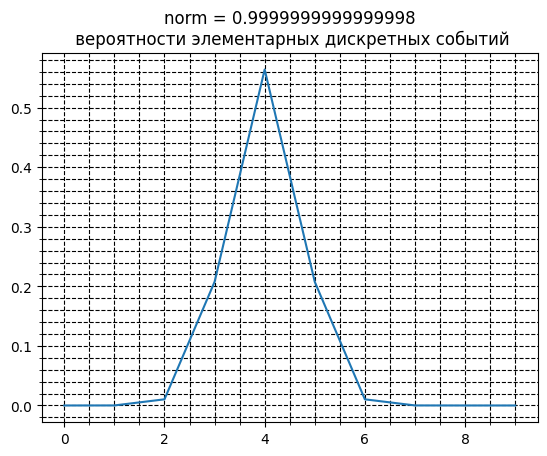

In [58]:
final_answer = ''
e_ = ''
for i in range(N):
    if i==N-1:
        final_answer += f'p_{i}'
        break
    f_i = 0.0
    for j in range(i):
        f_i += impirical_cnt[j]
    f_i += 2*impirical_cnt[i]
    f_i = f_i/total_cnt
    if f_i > 1.0 + delta_last:
        final_answer += f'p_{i} > '
        e_ += '1'
    elif f_i < 1.0-delta_last:
        final_answer += f'p_{i} = '
        e_ += '0'
    elif np.abs(f_i-1.0) <= delta_last:
        final_answer += f'p_{i} ? '
        e_ += '?'
fig,ax = plt.subplots()
x_ = Omega 
y_ = [Proba3(i,x_) for i in range(len(x_))]
ax.plot(x_,y_)
ax.set_title(f'norm = {np.sum(y_)}\n вероятности элементарных дискретных событий')
ax.minorticks_on()
ax.grid(which='both', color='k', linestyle='--')
print(final_answer)
print(e_)